In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset

In [2]:
df=pd.read_csv('50_Startups.csv')

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.shape

(108, 5)

In [5]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,108.000000,108.000000,108.000000,108.000000
mean,74959.338704,121750.788889,214952.664722,113523.760000
std,44996.368152,27322.385654,117937.942120,38991.013654
min,0.000000,51283.140000,0.000000,14681.400000
25%,38558.510000,105077.645000,134050.070000,90708.190000
50%,75791.365000,122699.795000,239452.750000,109543.120000
75%,101913.080000,145077.580000,298664.470000,141585.520000
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        108 non-null    float64
 1   Administration   108 non-null    float64
 2   Marketing Spend  108 non-null    float64
 3   State            108 non-null    object 
 4   Profit           108 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.3+ KB


In [7]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [8]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [9]:
df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

# Label Encoding

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
print(df.State.value_counts())

New York      39
California    36
Florida       33
Name: State, dtype: int64


In [12]:
df.State=le.fit_transform(df.State)

In [13]:
print(df.State.value_counts())

2    39
0    36
1    33
Name: State, dtype: int64


In [14]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


# Independent & Dependent Variables

In [15]:
x=df.iloc[:,:4]

In [16]:
x

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1
...,...,...,...,...
103,119943.24,156547.42,256512.92,1
104,114523.61,122616.84,261776.23,2
105,78013.11,121597.55,264346.06,0
106,94657.16,145077.58,282574.31,2


In [17]:
y=df.iloc[:,4:]

In [18]:
y

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94
...,...
103,132602.65
104,129917.04
105,126992.93
106,125370.37


# Train,Test & Split

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [20]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(86, 4)
(22, 4)
(86, 1)
(22, 1)


# Model Building

In [21]:
from sklearn.linear_model import LinearRegression
mlr=LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression()

In [22]:
y_test[0:5]

,Profit
84,64926.08
10,146121.95
75,90708.19
2,191050.39
24,108552.04


In [23]:
x_test[0:5]

,R&D Spend,Administration,Marketing Spend,State
84,1000.23,124153.04,1903.93,2
10,101913.08,110594.11,229160.95,1
75,28663.76,127056.21,201126.82,1
2,153441.51,101145.55,407934.54,1
24,77044.01,99281.34,140574.81,2


In [24]:
mlr.predict(x_test)

array([[ 48379.24868384],
       [134848.91924675],
       [ 76483.10965219],
       [181561.78529195],
       [112966.00035119],
       [134241.68257234],
       [129222.38731943],
       [160017.05919782],
       [116752.96050773],
       [ 46260.99264065],
       [102266.36060186],
       [115568.27177595],
       [ 48379.24868384],
       [119114.16525517],
       [ 88602.220028  ],
       [127101.40273621],
       [127101.40273621],
       [ 90942.33421504],
       [ 58677.73349899],
       [146304.26215169],
       [149410.05440997],
       [152502.87810445]])

In [25]:
from sklearn.metrics import r2_score
r2_score(y_test,mlr.predict(x_test))

0.9258962347554701

In [26]:
x_test

,R&D Spend,Administration,Marketing Spend,State
84,1000.23,124153.04,1903.93,2
10,101913.08,110594.11,229160.95,1
75,28663.76,127056.21,201126.82,1
2,153441.51,101145.55,407934.54,1
24,77044.01,99281.34,140574.81,2
100,100671.96,91790.61,249744.55,0
107,91749.16,114175.79,294919.57,1
7,130298.13,145530.06,323876.68,1
16,78013.11,121597.55,264346.06,0
86,0.00,135426.92,0.00,0


In [28]:
profit=mlr.predict([[101913.08,91790.61,264346.06,0]])

In [32]:
print('Profit:',profit)

Profit: [[135731.87263396]]


# Polynomial Regression

In [33]:
df=pd.read_csv('Position_Salaries.csv')

In [34]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [35]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [36]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [38]:
df.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [39]:
x=df.iloc[:,1:2]

In [40]:
x

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [41]:
y=df.iloc[:,2:]

In [42]:
y

,Salary
0,45000
1,50000
2,60000
3,80000
4,110000
5,150000
6,200000
7,300000
8,500000
9,1000000


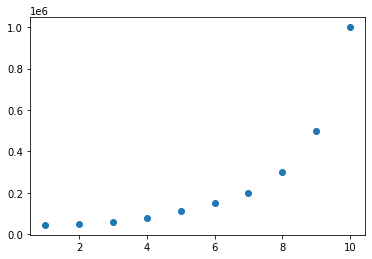

In [43]:
plt.scatter(x,y)

# Model Building

In [44]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x,y)

LinearRegression()

In [47]:
from sklearn.preprocessing import PolynomialFeatures
pr=PolynomialFeatures(degree=4)
xp=pr.fit_transform(x)
lr1=LinearRegression()
lr1.fit(xp,y)

LinearRegression()

In [48]:
xp

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [ ]:
# y=mx+c
# y=mx+mx2+mx3+mx4+c

Text(0, 0.5, 'Salary')

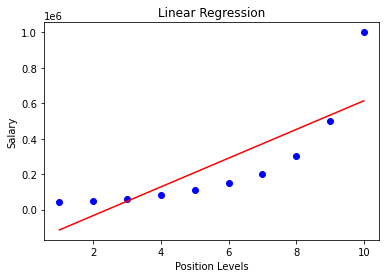

In [50]:
plt.scatter(x,y,color='blue')
plt.plot(x,lr.predict(x),'r')
plt.title('Linear Regression')
plt.xlabel('Position Levels')
plt.ylabel('Salary')


In [61]:
from sklearn.preprocessing import PolynomialFeatures
pr=PolynomialFeatures(degree=8)
xp=pr.fit_transform(x)
lr1=LinearRegression()
lr1.fit(xp,y)

LinearRegression()

Text(0, 0.5, 'Salary')

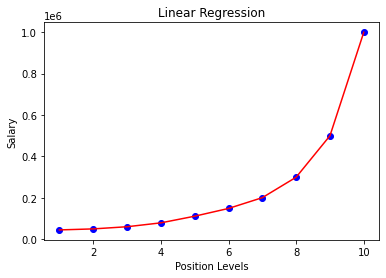

In [62]:
plt.scatter(x,y,color='blue')
plt.plot(x,lr1.predict(pr.fit_transform(x)),'r')
plt.title('Linear Regression')
plt.xlabel('Position Levels')
plt.ylabel('Salary')


In [69]:
salary=lr.predict([[5.5]])

In [70]:
salary

array([[249500.]])